**Clustering with K-Means:**

K-Means clustering is an unsupervised machine learning algorithm used to partition a dataset into a pre-defined number of clusters, denoted by 'K'. The algorithm aims to group data points that are similar to each other into the same cluster, while keeping dissimilar data points in different clusters.

**Objective**: Perform unsupervised learning with K-Means clustering.

**Tools**: Scikit-learn, Pandas, Matplotlib

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Collection and Preprocessing**

In [9]:
dataset = pd.read_csv('/content/Mall_Customers.csv')
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Handling missing values using mean/median/dropna()/fillna()**

In [10]:
dataset.dropna()
dataset.fillna(0)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Converting categorical data into numerical data (Feature scaling)**

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
catg_cols = dataset.select_dtypes(include = ['object','category']).columns
catg_cols

Index(['Gender'], dtype='object')

In [13]:
dataset['Gender'] = le.fit_transform(dataset['Gender'])

**Generating summary statistics**

In [14]:
x = dataset.drop('Gender',axis=1)

In [15]:
y = dataset[['Gender']]

In [16]:
dataset.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [27]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(x.values)

**Fit K-Means and assign cluster labels.**

In [17]:
from sklearn.cluster import KMeans

In [18]:
def fit_kmeans(X, k, seed=42):
    km = KMeans(n_clusters=k, n_init=10, random_state=seed)
    labels = km.fit_predict(X)
    return km, labels


**Elbow Method to find an optimal K**

In [19]:
K_range = range(2, 11)
inertias = []
for k in K_range:
    km, _ = fit_kmeans(x.values, k)
    inertias.append(km.inertia_)

**Elbow Curve**

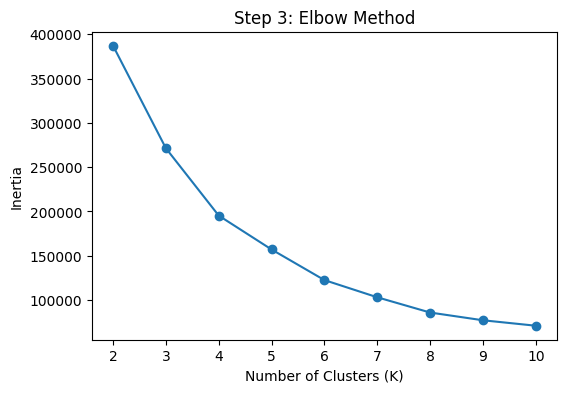

In [20]:
plt.figure(figsize=(6,4))
plt.plot(list(K_range), inertias, marker="o")
plt.xlabel("Number of Clusters (K)"); plt.ylabel("Inertia")
plt.title("Step 3: Elbow Method")
plt.show()

**Fit K-Means with chosen K & visualize clusters**

In [23]:
optimal_k = 5
K = optimal_k

In [24]:
kmeans, labels = fit_kmeans(x.values, K)

In [30]:
centroids_pca = pca.transform(kmeans.cluster_centers_)

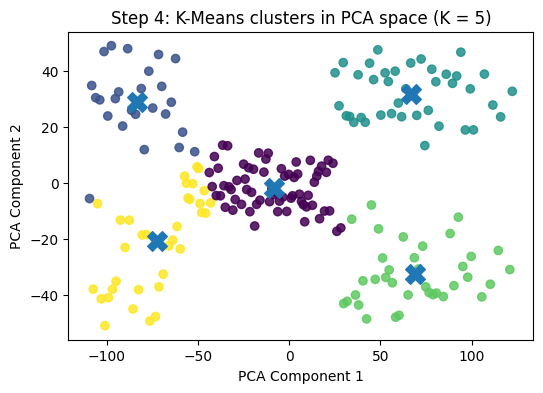

In [31]:
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, alpha=0.85)  # color-coded by label
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], marker="X", s=200)
plt.xlabel("PCA Component 1"); plt.ylabel("PCA Component 2")
plt.title(f"Step 4: K-Means clusters in PCA space (K = {K})")
plt.show()

**Evaluate with Silhouette Score**

In [33]:
from sklearn.metrics import silhouette_score

In [35]:
score = silhouette_score(x.values, labels)
score

np.float64(0.42477854750975896)

**Summary**

**Preprocessing steps included**:

Handling missing values (e.g., dropping or imputing them).

Converting categorical variables (if any) using encoding techniques.

Scaling/normalizing data if required.

Selecting relevant features and target variable.

**Fitting K-Means and assigning lables to the clusters**

**Finding an optimal K using Elbow method and plot Elbow curve and visualize the clusters**

**Evaluate with Silhouette Score**